In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Yêu cầu 1: Xác định và hiển thị các điểm interest/key points 

In [2]:
img_folder = './images'

In [3]:
def harris_corner_detection(img_file, k=0.04, threshold=0.01):
    # Tải hình ảnh ở dạng grayscale
    img_path = os.path.join(img_folder, img_file)
    
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Chuyển đổi sang kiểu float32
    gray = np.float32(gray)

    # Áp dụng thuật toán Harris Corner Detection
    dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=k)

    # Giãn các góc phát hiện được để chúng dễ nhìn hơn
    dst = cv2.dilate(dst, None)

    # Ngưỡng giá trị tối ưu, đánh dấu các góc trong ảnh
    img[dst > threshold * dst.max()] = [0, 0, 255]  # Đánh dấu keypoints bằng màu đỏ

    return img

In [4]:
def display_images(img1, img2, title1="Image 1", title2="Image 2"):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis('off')

    plt.show()

In [5]:
def find_keypoints(img1, img2, k, threshold):
    img1_corners = harris_corner_detection(img1, k=k, threshold=threshold)
    img2_corners = harris_corner_detection(img2, k=k, threshold=threshold)

    # Hiển thị các ảnh với các keypoints tìm được
    display_images(img1_corners, img2_corners, title1=img1, title2=img2)


In [6]:
image_pairs = [
    ("cow1.jpg", "cow2.jpg"),
    ("match1.jpg", "match2.jpg"),
    ("graf_img1.jpg", "graf_img5.jpg"),
]

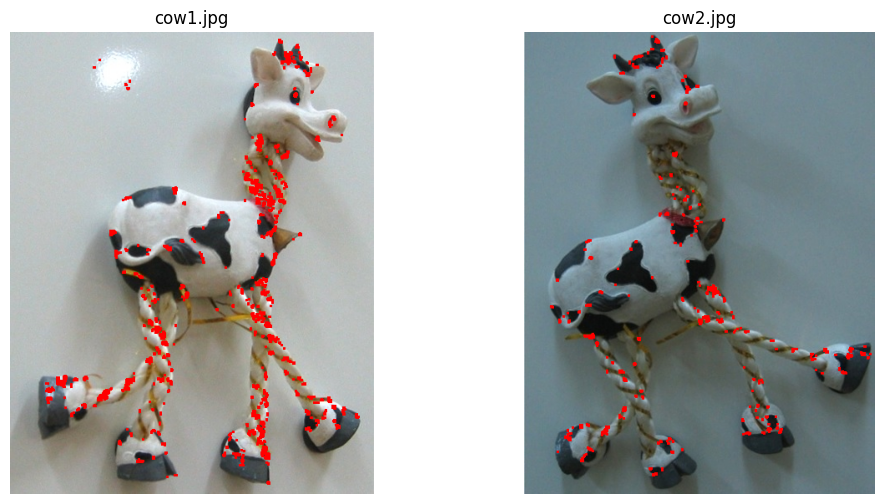

In [7]:
find_keypoints("cow1.jpg", "cow2.jpg", k=0.04, threshold=0.004)

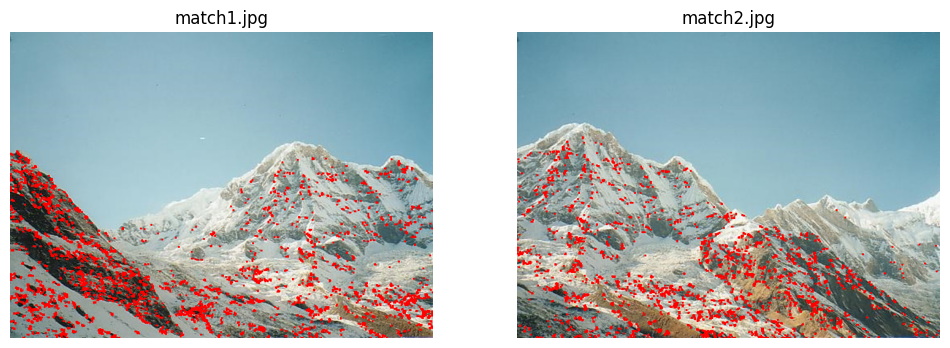

In [8]:
find_keypoints("match1.jpg", "match2.jpg", k=0.05, threshold=0.05)

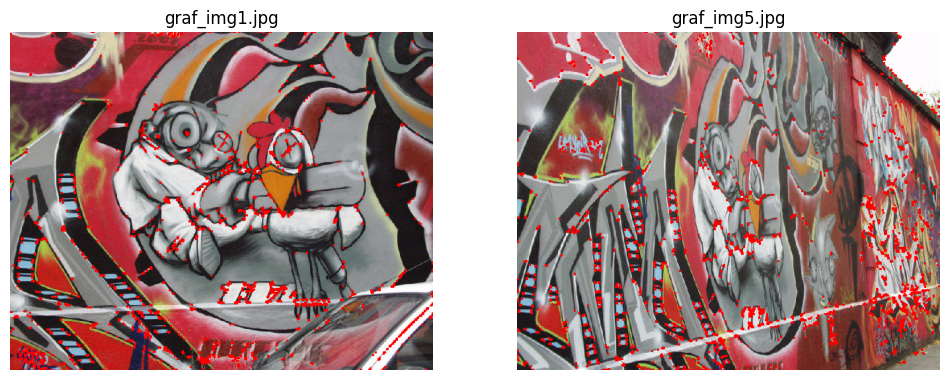

In [9]:
find_keypoints("graf_img1.jpg", "graf_img5.jpg", k=0.04, threshold=0.01)

# Yêu cầu 2: Vẽ hình minh họa kết quả xác định các keypoints và descriptor

In [10]:
# Hàm phát hiện và mô tả keypoints
def detect_and_describe(img_file, method="ORB"):
    # Đọc ảnh
    img_path = os.path.join(img_folder, img_file) 
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    if method == "ORB":
        # Sử dụng ORB
        detector = cv2.ORB_create()
    elif method == "BRIEF":
        # Sử dụng FAST để phát hiện keypoints
        fast = cv2.FastFeatureDetector_create()
        keypoints = fast.detect(img, None)
        
        # Sử dụng BRIEF để tính descriptor
        brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
        keypoints, descriptors = brief.compute(img, keypoints)
        return img, keypoints, descriptors
    else:
        raise ValueError("Phương pháp không được hỗ trợ: Chọn ORB hoặc BRIEF")
    
    # Phát hiện keypoints và tính descriptor
    keypoints, descriptors = detector.detectAndCompute(img, None)
    return img, keypoints, descriptors

In [11]:
def display_keypoints(image, keypoints, title):
    img_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))
    plt.figure(figsize=(8, 8))
    plt.imshow(img_with_keypoints, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

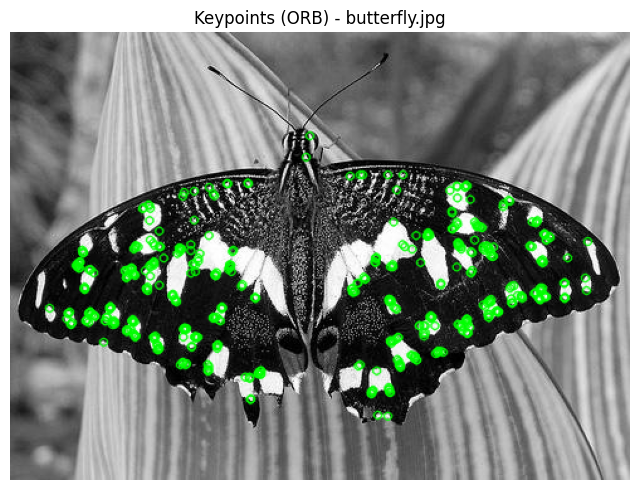

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

In [12]:
image_paths = ["butterfly.jpg", "home.jpg", "simple.jpg"]

# Xử lý từng ảnh với cả ORB và BRIEF
for img_path in image_paths:
    # ORB
    img, keypoints_orb, descriptors_orb = detect_and_describe(img_path, method="ORB")
    display_keypoints(img, keypoints_orb, f"Keypoints (ORB) - {img_path}")
    
    # BRIEF
    img, keypoints_brief, descriptors_brief = detect_and_describe(img_path, method="BRIEF")
    display_keypoints(img, keypoints_brief, f"Keypoints (BRIEF) - {img_path}")

In [129]:
pip install opencv-contrib-python

  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/a7/9e/7110d2c5d543ab03b9581dbb1f8e2429863e44e0c9b4960b766f230c1279/opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl (45.5 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\huyen\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [132]:
print(cv2.__version__)


4.10.0
